In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

Определим какую-нибудь функцию. В данном случае используется [функция Розенброка](https://ru.wikipedia.org/wiki/Функция_Розенброка):

$$f(x, y) = (1-x)^2 + 100(y-x^2)^2.$$

Функция `f`, определяемая ниже, принимает на вход один векторный аргумент $u$, $x$ и $y$ — его компоненты.

In [1]:
def f(u):
    # u[0] = x, u[1] = y
    return (1 - u[0]) ** 2 + \
            100 * (u[1] - u[0] ** 2) ** 2

Нам потребуется также вычислить вектор градиента функции $f$, то есть вектор $(f'_x, f'_y)$.

In [5]:
def Df(u):
    return np.array([-2 * (1 - u[0]) - \
            100 * 2 * (u[1] - u[0] ** 2) * 2 * u[0], 
            100 * 2 * (u[1] - u[0] ** 2)])

In [2]:
from scipy.linalg import norm
# функция, вычисляющая норму вектора

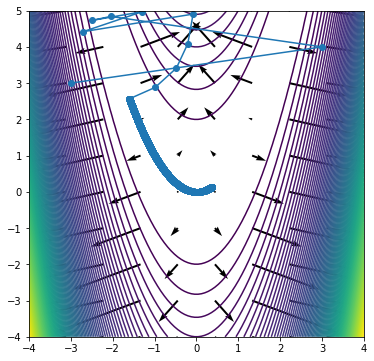

In [26]:
delta = 0.001 / 1.2
# learning rate — переменная, которая показывает, насколько
# большие шаги будут делаться каждый раз

steps = 200000
# общее число шагов

x_prev = np.array([-3, 3])
# стартовая точка алгоритма

x_ = np.linspace(-4, 4, 100)
y_ = np.linspace(-4, 5, 100)
# массивы, состоящие из 100 точек, разбивающих на равные части 
# соответствующие отрезки

x, y = np.meshgrid(x_, y_)
# сетка, составленная из указанных выше точек
# теперь x и y — двумерные массивы, x[i][j] — это
# x-координата (i, j)-й точки сетки,
# а y[i][j] — её же y-координата
# это нужно, чтобы уметь вычислять значения функций в точках сетки
# например, для рисования линий уровня

plt.figure(figsize=(6, 6))
plt.contour(x, y, f([x, y]), 100)
# нарисовали линии уровня функции f
# здесь x и y — двумерные массивы, но наша функция устроена так,
# что работат все операции производит поэлементно,
# поэтому в результате получается двумерный массив, состоящий из всевозможных
# значений, принимаемых функцией в точках сетки

points = []
# инициализация points — списка точек, которые будет находить наш алгоритм
for i in range(steps):
    points.append(x_prev)
    # добавить предыдущую точку
    
    x_new = x_prev - delta * Df(x_prev)
    # вычислить новую точку по правилу:
    # взять предыдущую и вычесть вектор градиента,
    # вычисленный в предыдущей точке, умноженный на learning rate
    
    # идея состоит в том, что вектор градиента — это вектор самого крутого
    # подъема, а нам нужен быстрый спуск, поэтому мы сдвигаемся в 
    # противоположную сторону
    
    x_prev = x_new
    # теперь новая точка стала старой
    
    if norm(Df(x_new)) < 1:
        break
        # если вектор градиента достаточно маленький, нужно остановиться

plt.plot([p[0] for p in points], [p[1] for p in points]
         , 'o-')
# мы рисуем наши точки, которые алгоритм проходил на каждом шаге
# для этого от каждого элемента points мы выбираем его первую координату
# и вторую координату (список x'ов и список y'ов)

x_ = np.linspace(-4, 4, 10)
y_ = np.linspace(-4, 5, 10)
x, y = np.meshgrid(x_, y_)
plt.quiver(x, y, *Df([x, y]), scale=10000, color='black')
# нарисуем ещё в каждой точке сетки вектор градиента
# убедимся, что он перпендикулярен линии уровня


In [27]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Surface, Scatter3d

In [28]:
init_notebook_mode()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [29]:
x, y = np.mgrid[-3:3:100j, -1:6:100j]
iplot([Surface(x=x, y=y, z=f([x, y])),
       Scatter3d(x = [p[0] for p in points],
                 y = [p[1] for p in points],
                 z = [f(p) for p in points], mode = 'line')])